In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


%matplotlib inline
plt.close('all')

import warnings
warnings.filterwarnings('ignore')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
df_1 = pd.read_csv(r"/workspaces/codespaces-jupyter/data/Monkey_Pox_Cases_Worldwide.csv")
df_2 =pd.read_csv(r"/workspaces/codespaces-jupyter/data/Worldwide_Case_Detection_Timeline.csv")
df_3 = pd.read_csv(r"/workspaces/codespaces-jupyter/data/Daily_Country_Wise_Confirmed_Cases.csv")


In [43]:
fig= px.choropleth(
    df_1,
    locations='Country',
    locationmode='country names',
    color='Confirmed_Cases',
    title='Confirmed Cases Across the World'
    )
fig.show()

In [41]:
def top_plots(col=None):
    data1_sorted=df_1.sort_values(by=col,ascending=False)
    top10 = data1_sorted[:10]
    label_text = ' '.join(col.split('_'))
    fig1=px.bar(x="Country" ,y=col,data_frame=top10,labels=['Country',label_text], color=col,color_continuous_scale='dense',
                 text_auto=True,title=f'Top 10 Countries based on {label_text}')
    fig1.show()

In [42]:
top_plots(col='Confirmed_Cases')
top_plots(col='Suspected_Cases')
top_plots(col='Hospitalized')

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Gender', ylabel='count'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'male'),
  Text(1, 0, 'female'),
  Text(2, 0, 'male '),
  Text(3, 0, 'female '),
  Text(4, 0, 'Male')])

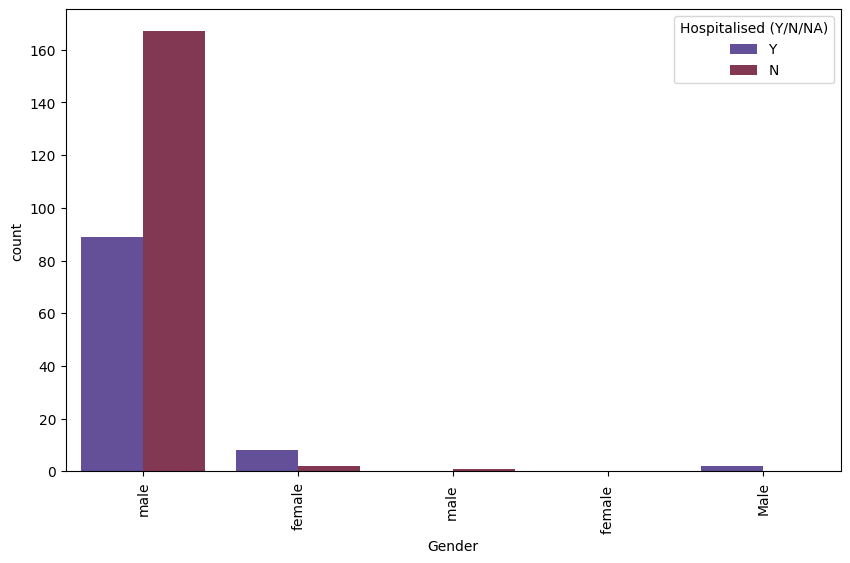

In [30]:
plt.figure(figsize = (10,6))
sns.countplot(x="Gender", data=df_2, hue = "Hospitalised (Y/N/NA)",palette="twilight")
plt.xticks(rotation = 90)
plt.show()

<Figure size 1000x800 with 0 Axes>

<AxesSubplot: xlabel='count', ylabel='Symptoms'>

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

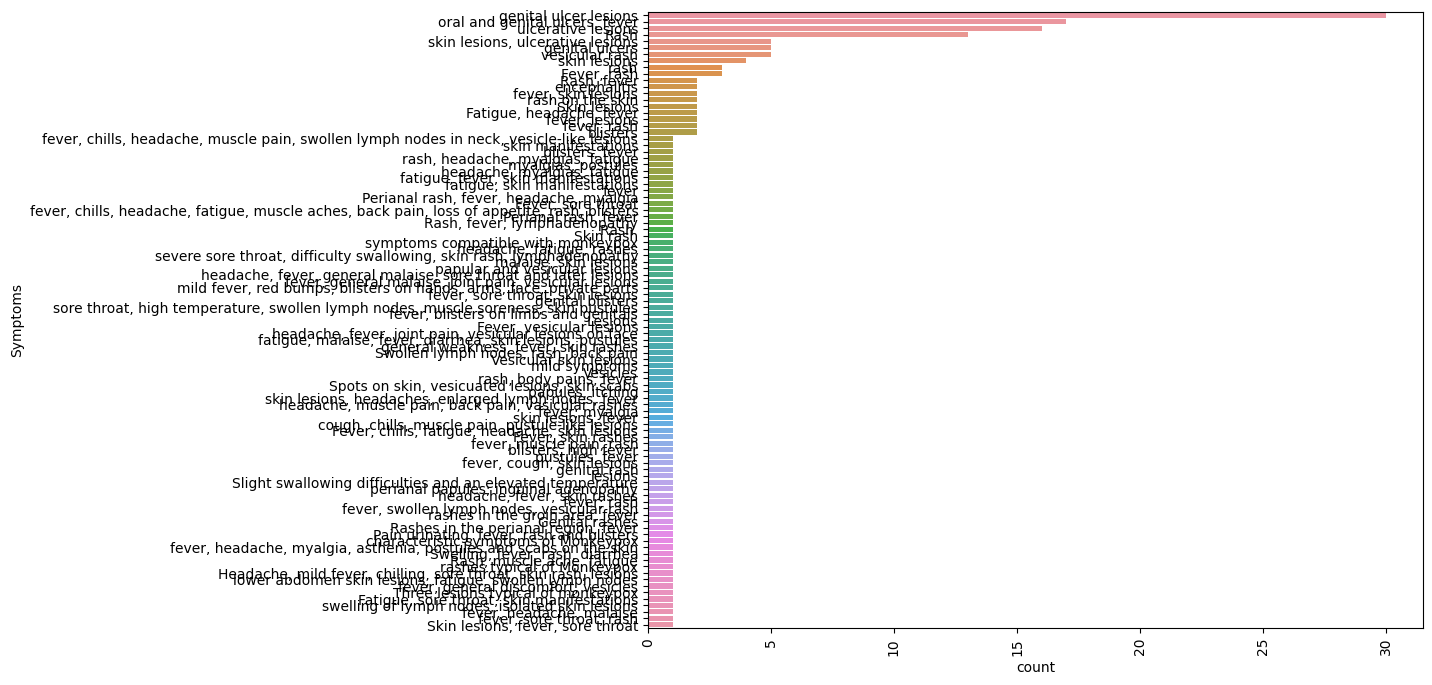

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(y='Symptoms', data=df_2, order  = df_2['Symptoms'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [32]:
ts_data = df_2['Date_confirmation'].value_counts()
ts_data.columns = ['cases']
ts_data.sort_index(inplace=True)
ts_data = pd.DataFrame(ts_data)
ts_data.rename(columns = {'Date_confirmation':'cases'}, inplace = True)
ts_data

,cases
01-06-2022,84
01-07-2022,269
01-08-2022,1219
01-09-2022,937
02-06-2022,125
...,...
31-01-2022,3
31-03-2022,6
31-05-2022,65
31-07-2022,131


In [44]:
fig = px.line(ts_data, x=ts_data.index, y="cases", width=700, color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title="Cases", xaxis_title="Days", yaxis_title="Number of Cases",height=700,width=1200)
fig.show()

(<Figure size 2000x1000 with 1 Axes>, <AxesSubplot: >)

Text(0.5, 1.0, '\nCountry-wise Travel History\n')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Cases')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'Portugal'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Argentina'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Puerto Rico'),
  Text(9, 0, 'Czech Republic'),
  Text(10, 0, 'Jamaica'),
  Text(11, 0, 'South Africa'),
  Text(12, 0, 'Israel'),
  Text(13, 0, 'India'),
  Text(14, 0, 'Canada')])

[Text(0, 2, '41'),
 Text(0, 2, '19'),
 Text(0, 2, '0'),
 Text(0, 2, '20'),
 Text(0, 2, '19'),
 Text(0, 2, '11'),
 Text(0, 2, '9'),
 Text(0, 2, '2'),
 Text(0, 2, '6'),
 Text(0, 2, '6'),
 Text(0, 2, '2'),
 Text(0, 2, '3'),
 Text(0, 2, '5'),
 Text(0, 2, '4'),
 Text(0, 2, '5')]

[Text(0, 2, '11'),
 Text(0, 2, '16'),
 Text(0, 2, '34'),
 Text(0, 2, '4'),
 Text(0, 2, '4'),
 Text(0, 2, '1'),
 Text(0, 2, '0'),
 Text(0, 2, '7'),
 Text(0, 2, '0'),
 Text(0, 2, '0'),
 Text(0, 2, '4'),
 Text(0, 2, '2'),
 Text(0, 2, '0'),
 Text(0, 2, '1'),
 Text(0, 2, '0')]

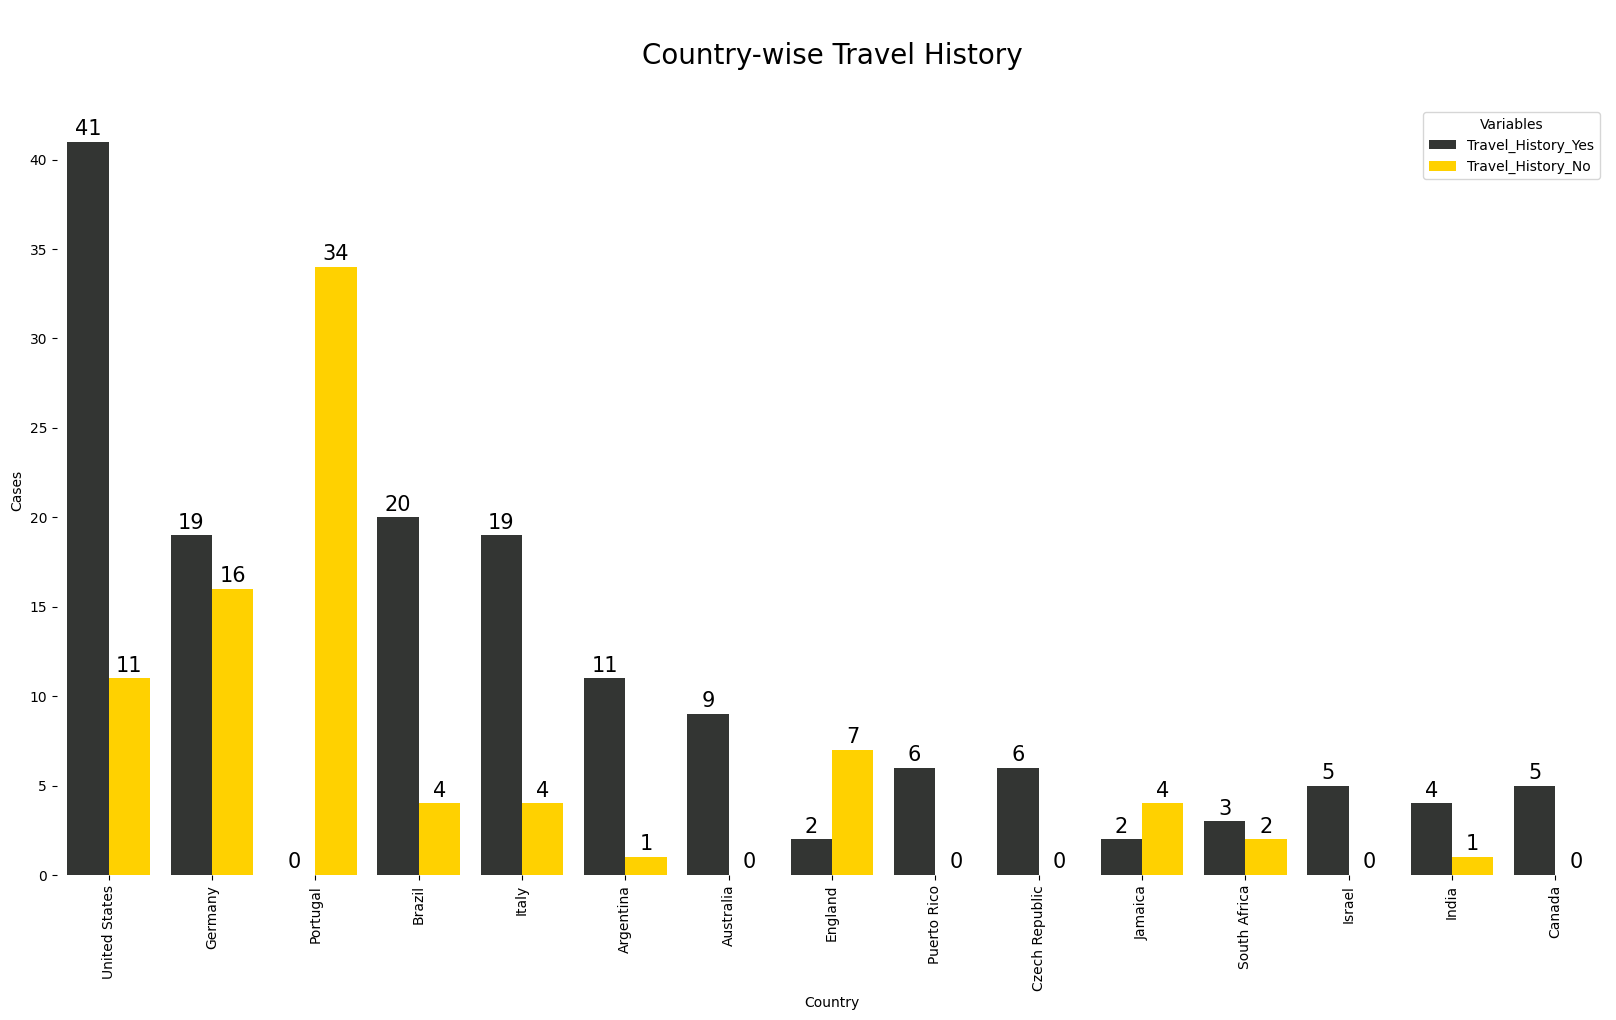

In [34]:
df_1["Travel_History"] = df_1[["Travel_History_Yes","Travel_History_No"]].sum(axis=1)
case_temp5 = df_1.sort_values(["Travel_History"],ascending=False)[:15]

case_temp5_melt = case_temp5.melt(id_vars=['Country'], value_vars=["Travel_History_Yes","Travel_History_No"],
                  var_name="Variables", value_name="Values")

plt.subplots(figsize=(20,10))
p = sns.barplot(x=case_temp5_melt["Country"],y=case_temp5_melt["Values"],hue=case_temp5_melt["Variables"],palette=["#333533","#ffd100"], saturation=1)
p.axes.set_title("\nCountry-wise Travel History\n",fontsize=20)
plt.xlabel("Country")
plt.ylabel("Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

In [35]:
df_1["Total_Cases"] = df_1[["Confirmed_Cases","Suspected_Cases"]].sum(axis=1)

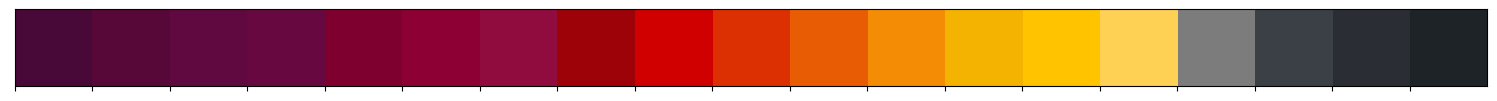

In [36]:
palette_cmap = ["#480838","#580838","#600840","#680840","#7e002f","#8c0034","#900C3F","#9D0208","#D00000","#DC2F02","#E85D04","#F48C06","#F5B301","#FFC300","#FED053","#7C7C7C","#3B3F46","#2A2E34","#1E2328"]

sns.palplot(sns.color_palette(palette_cmap))
plt.show()

(<Figure size 1000x800 with 1 Axes>, <AxesSubplot: >)

<AxesSubplot: >

Text(0.5, 1.0, 'Pearson Correlation Of Features\n')

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Confirmed_Cases'),
  Text(1.5, 0, 'Suspected_Cases'),
  Text(2.5, 0, 'Hospitalized'),
  Text(3.5, 0, 'Travel_History_Yes'),
  Text(4.5, 0, 'Travel_History_No')])

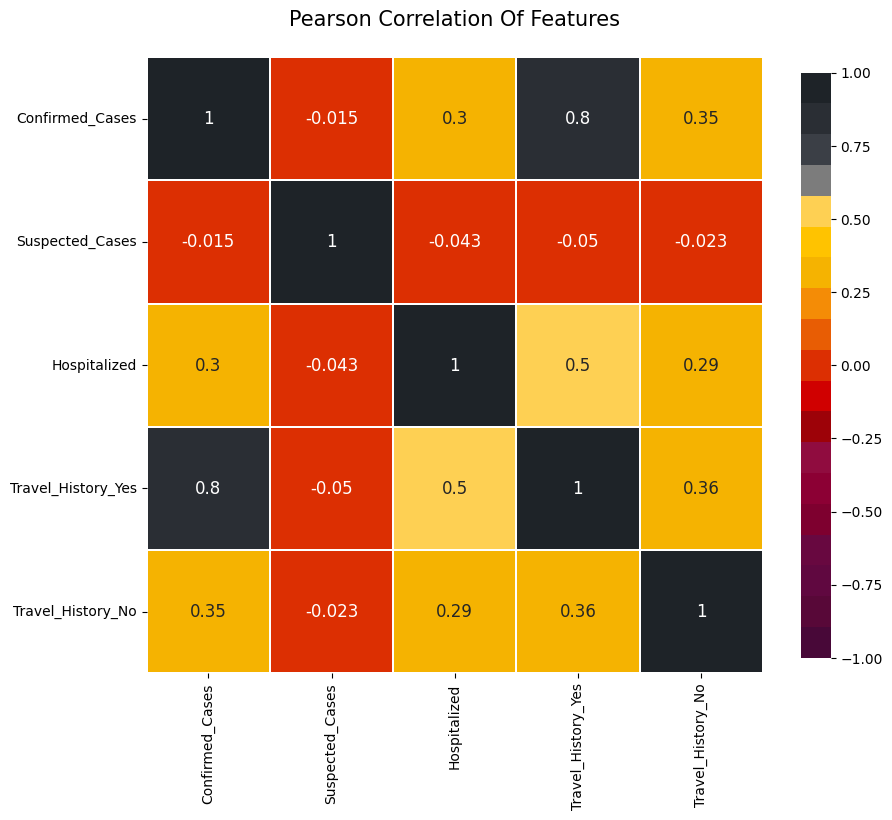

In [37]:
plt.subplots(figsize =(10, 8))

sns.heatmap(df_1.drop(columns=["Country","Total_Cases","Travel_History"]).corr(), cmap = palette_cmap, square=True, cbar_kws=dict(shrink =.95), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='Confirmed_Cases', ylabel='Travel_History_Yes'>

Text(0.5, 1.0, 'Confirmed Cases vs Travel History - Yes')

Text(0.5, 0, 'Confirmed Cases')

Text(0, 0.5, 'Travel History - Yes')

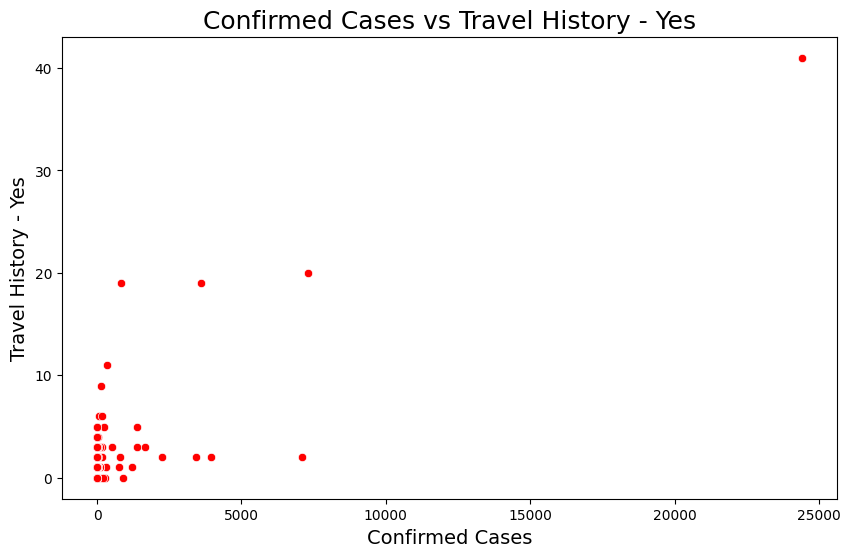

In [38]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='Confirmed_Cases',y='Travel_History_Yes',color='r',data=df_1)
plt.title('Confirmed Cases vs Travel History - Yes',size=18)
plt.xlabel('Confirmed Cases',size=14)
plt.ylabel('Travel History - Yes',size=14)
plt.show()

In [39]:
date = list(df_1[-1:].columns[1:-1])
case = list(df_1[-1:].values[0][1:-1])
mean_case = []
for i in range(1, len(case)+1):
    mean_case.append(sum(case[:i])/i)

fig = px.line()
# fig = px.line(x=date, y=case,name='total case')
fig.add_scatter(x=date, y=case,mode='lines',name='total case')
fig.add_scatter(x=date, y=mean_case,mode='lines',name='mean case')
fig.update_layout(
    title_text='Increase of monkeypox cases',
    xaxis_title="Date",
    yaxis_title="Cases"
)